# COMPACT REG BENCHMARK 

In [ ]:
TODO 
- error computation 
- evaluation scores same ? 
- prepare sanity check and evaluation plots and tables 

### 1. PARSE AND LOAD RESULTS

In [136]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import glob 
sns.set_context("talk")
data_dir = "/home/luisasantus/Desktop/crg_cluster/projects/structural_regression/results/homfam/"


# load families summary
summary_homfam_exthomfam = pd.read_csv("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/01_summary_homfam_exthomfam.csv")
summary_homfam = summary_homfam_exthomfam[summary_homfam_exthomfam.dataset == "homfam"]
families = summary_homfam.drop(["subset", "file", "min_length", "max_length", "perc_ref_total", "dataset"], axis = 1)

In [137]:
score_files = glob.glob(os.path.join(data_dir, "evaluation/score/*regressive_comp_analysis*"))
gap_files = glob.glob(os.path.join(data_dir, "evaluation/gaps/*regressive_comp_analysis*totGap"))
trace_files = glob.glob(os.path.join(data_dir, "compact_benchmark/*/*/.command.trace"))

In [138]:
# 1. PREP SCORES
def get_scores(score_files): 
    def parse_score(score_file): 
        return(pd.read_csv(score_file,sep = ";", header = None).drop(4, axis = 1))

    scores = pd.concat(list(map(parse_score, score_files)))
    scores = scores.iloc[:,0:4]
    scores.columns = ['name', 'sp', 'tc', 'column']
    #scores.name = scores.name.str.split(".", expand = True)[:-1]
    scores[["family", "method", "bucket_size", "align_method", "tree_method"]] = scores.name.str.split(".", expand = True)
    scores = scores.drop("method", axis = 1)
    return(scores)

# 2. PREP GAPS 
def get_gaps(files): 
    def parse_gaps(gap_file): 
        gaps = pd.read_csv(gap_file, header = None)
        gaps["name"] = os.path.splitext(os.path.basename(gap_file))[0]
        return(gaps)
    gaps = pd.concat(list(map(parse_gaps, files)))
    gaps.columns = ['gaps', 'name']
    return(gaps)

# 3. PREP TRACES
def get_traces(files): 
    def parse_trace(trace):
        f = os.path.basename(os.path.dirname(trace))
        df = pd.read_csv(trace, sep = "=").T
        df["name"] = f
        return(df.reset_index().drop("index", axis = 1))
    
    df = pd.concat(list(map(parse_trace, files)))
    df = df[["name", "realtime", "vmem"]]
    return(df)

# COMPUTE
scores = get_scores(score_files)
gaps = get_gaps(gap_files)
traces = get_traces(trace_files)

# MERGE ALL STATS
stats = scores.merge(gaps, on = "name")
stats = stats.merge(traces, on = "name")

# and add families info 
stats = stats.merge(families, on = "family")

In [143]:
stats[stats.size_group == "medium"].align_method.value_counts()

expand     20
compact     3
Name: align_method, dtype: int64

In [153]:
stats.sort_values("n_sequences")[1:40]

,name,sp,tc,column,family,bucket_size,align_method,tree_method,gaps,realtime,vmem,n_sequences,mean_length,size_group
22,seatoxin.regressive_comp_analysis.1000.compact...,82.6,57.1,56.7,seatoxin,1000,compact,MBED,1150,597,37508,93,43.634409,small
29,hip.regressive_comp_analysis.1000.compact.MBED,86.9,65.5,72.4,hip,1000,compact,MBED,5643,995,37152,167,66.209581,small
28,hip.regressive_comp_analysis.1000.expand.MBED,86.9,65.5,72.4,hip,1000,expand,MBED,5643,1047,37152,167,66.209581,small
111,scorptoxin.regressive_comp_analysis.1000.compa...,94.0,78.1,86.5,scorptoxin,1000,compact,MBED,14427,1319,155672,363,53.256198,small
110,scorptoxin.regressive_comp_analysis.1000.expan...,94.0,78.1,86.5,scorptoxin,1000,expand,MBED,14427,1291,182844,363,53.256198,small
54,cyt3.regressive_comp_analysis.1000.expand.MBED,84.8,62.7,68.8,cyt3,1000,expand,MBED,87277,3344,247528,385,92.306494,small
55,cyt3.regressive_comp_analysis.1000.compact.MBED,84.8,62.7,68.8,cyt3,1000,compact,MBED,87277,4380,184452,385,92.306494,small
26,rnasemam.regressive_comp_analysis.1000.expand....,93.6,73.1,83.1,rnasemam,1000,expand,MBED,25860,3465,186580,498,120.072289,small
25,rnasemam.regressive_comp_analysis.1000.compact...,93.6,73.1,83.1,rnasemam,1000,compact,MBED,25860,2854,184576,498,120.072289,small
24,bowman.regressive_comp_analysis.1000.expand.MBED,89.8,71.4,74.4,bowman,1000,expand,MBED,26375,957,37508,499,26.144289,small


### 2. ANALYSIS

#### 1. SANITY CHECK: Does compact produce alignments with fewer gaps? 

[Text(0.5, 0, 'family size'), Text(0, 0.5, '# of gaps')]

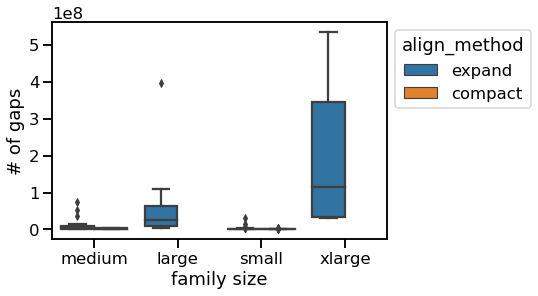

In [145]:
ax = sns.boxplot(data=stats, x="size_group", y="gaps", hue="align_method")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(xlabel='family size', ylabel='# of gaps')


In [ ]:
# Plot with dots and family size 
# Number of gaps 
# Heatmap 

#### Table with average across families 

In [147]:
table_pooled = stats.groupby(["align_method"], as_index = False).agg(
    sp_mean=('sp',"mean"),
    sp_variance=('sp', "var"),    
    tc_mean=('tc',"mean"),
    tc_variance=('tc', "var"), 
    time_mean=('realtime',"mean"),
    time_variance=('realtime', "var")
)
table_pooled

,align_method,sp_mean,sp_variance,tc_mean,tc_variance,time_mean,time_variance
0,compact,86.918919,102.991021,65.581081,366.213799,13711.891892,2.558067e+08
1,expand,81.602198,220.402440,57.801099,591.956554,67848.142857,1.359612e+10


# Next questions, what about when using different trees? 
# Is it more resiliant 